In [2]:
import os

from fooof import FOOOF
from fooof.plts.spectra import plot_spectrum, plot_spectra
import mne
import mne_bids
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import pandas as pd
import scipy
from scipy import stats

In [9]:
alpha = pd.read_csv('Source_sub006_only_alpha.csv', index_col=[0])
lbeta = pd.read_csv('Source_sub006_only_low_beta.csv', index_col=[0])
beta = pd.read_csv('Source_sub006_only_high_beta.csv', index_col=[0])

In [10]:
#taking average of anexponent across all peaks
exp1 = alpha['Exponent STN']
exp2 = lbeta['Exponent STN']
exp3 = beta['Exponent STN']
#creating a new pd with exp values
exp = [exp1, exp2, exp3]
exponent = pd.concat(exp, axis=1, join='inner')
#calculating mean value
exponent = exponent.mean(axis = 1)

In [11]:
#taking average of an offset across all peaks
offset1 = alpha['Offset STN']
offset2 = lbeta['Offset STN']
offset3 = beta['Offset STN']
#creating a new pd with offset values
offset = [offset1, offset2, offset3]
ofs = pd.concat(offset, axis=1, join='inner')
#calculating mean value
ofs = ofs.mean(axis = 1)

In [24]:
#taking average error across per. and aper. errors of all peaks
alpha_error = alpha[['R_squared STN Periodic','R_squared STN Aperiodic']]
lbeta_error = lbeta[['R_squared STN Periodic','R_squared STN Aperiodic']]
beta_error = beta[['R_squared STN Periodic','R_squared STN Aperiodic']]

# #creating a new pd with exp values
err = [alpha_error, lbeta_error, beta_error]
error = pd.concat(err, axis=1, join='inner')
# #calculating mean value
error = error.mean(axis = 1)

In [32]:
new_alpha = alpha.drop(['Exponent STN','Offset STN',
                        'CF low beta STN','Ampl low beta STN','BW low beta STN',
                       'Ampl beta STN','CF high beta STN', 'BW beta STN', 
                        'R_squared STN Periodic','R_squared STN Aperiodic'], axis = 1)

new_lbeta = lbeta.drop(['Exponent STN','Offset STN',
                      'CF alpha STN','Ampl alpha STN','BW alpha STN',
                      'Ampl beta STN','CF high beta STN', 'BW beta STN',
                       'R_squared STN Periodic','R_squared STN Aperiodic'], axis=1) 
new_beta = beta.drop(['Exponent STN','Offset STN',
                      'CF alpha STN','Ampl alpha STN','BW alpha STN',
                      'CF low beta STN','Ampl low beta STN','BW low beta STN',
                      'R_squared STN Periodic','R_squared STN Aperiodic'], axis=1) 

In [44]:
final = [exponent, ofs, new_alpha, new_lbeta, new_beta]
df = pd.concat(final, axis=1, join='inner')
display(df)

,0,1,CF alpha STN,Ampl alpha STN,BW alpha STN,CF low beta STN,Ampl low beta STN,BW low beta STN,CF high beta STN,Ampl beta STN,BW beta STN
0,2.669858,6.445588,NaN,NaN,NaN,19.342518,1.169625,9.542666,29.772701,0.898033,13.197867
1,2.003859,5.234535,10.316466,0.092185,1.676121,17.879771,1.351813,6.377416,28.928990,1.005203,12.572276
2,1.765308,4.780586,9.523889,0.172490,1.795582,17.355951,1.089271,6.072225,28.236140,1.067148,12.005561
3,1.840413,4.916558,NaN,NaN,NaN,17.205992,0.942089,5.910095,29.188721,1.048451,10.795814
4,1.982213,5.154096,NaN,NaN,NaN,16.994988,0.784409,6.019515,28.382445,1.072644,11.433769
5,2.099982,5.398724,9.796237,0.164610,2.087387,17.429566,0.851160,6.651807,29.305385,1.044286,11.628080
6,1.828660,4.907660,9.877616,0.328963,1.941236,17.409686,0.877051,6.746617,28.096779,1.162764,10.529095
7,2.009335,5.225366,9.870731,0.266018,2.472652,16.943355,0.891355,7.260946,27.945942,1.202812,11.576715
8,2.337181,5.848643,9.237053,0.205525,1.425117,17.407416,0.807904,6.986934,29.314239,1.047639,12.110520
9,2.135934,5.495981,9.770984,0.117132,1.313007,17.583731,0.955792,5.868535,30.028991,0.891375,11.318636


In [45]:
STN = df.rename(columns={0: 'Exponent STN', 1: 'Offset STN', 
                         'Ampl beta STN': 'Ampl high beta STN',
                         'BW beta STN': 'BW high beta STN'})

In [83]:
ecog = pd.read_csv('sub006_ecog_only_peaks.csv', index_col=[0])

In [84]:
ECOG_err = ecog['Mean R^2']

In [87]:
ecog = ecog.drop([ 'Mean R^2'], axis = 1)

In [88]:
ecog

,Exponent ECoG,Offset ECoG,CF alpha ECoG,Ampl alpha ECoG,BW alpha ECoG,CF beta peak ECoG,Ampl beta peak ECoG,BW beta peak ECoG
0,3.405623,-3.310362,8.636583,0.317814,3.368114,27.117374,0.688352,11.399830
1,4.648813,-1.183191,9.829850,0.418248,4.002975,26.855252,0.925744,10.330434
2,5.193149,-0.182536,8.079954,0.387546,3.170335,26.351707,0.776245,10.672571
3,5.402087,0.221986,9.254781,0.433726,4.646926,26.269457,0.862236,11.178360
4,5.740273,0.787450,8.604236,0.689786,3.771199,26.416995,0.907164,10.445318
5,4.924656,-0.649016,NaN,NaN,NaN,28.043940,0.931579,11.042585
6,5.363552,0.155557,9.486013,0.898214,4.261532,26.765784,0.700847,12.436303
7,5.495098,0.488117,9.747815,0.698771,4.536928,25.487511,0.842449,12.120440
8,4.961988,-0.561884,9.017023,0.756644,4.306965,26.674365,0.762787,11.261866
9,5.472964,0.384761,8.870529,0.589271,3.371890,26.275743,0.772286,12.402533


In [89]:
error_full = [ECOG_err,error]
result_err = pd.concat(error_full, axis=1, join='inner')

In [90]:
result_err = result_err.mean(axis = 1)

In [91]:
# full = [df_aperiodic_STN, stn, df_aperiodic_ECoG, s, df_mean]
full = [STN, ecog, result_err]

# merging data frames and creating one ECoG df
result = pd.concat(full, axis=1, join='inner')
display(result)

,Exponent STN,Offset STN,CF alpha STN,Ampl alpha STN,BW alpha STN,CF low beta STN,Ampl low beta STN,BW low beta STN,CF high beta STN,Ampl high beta STN,BW high beta STN,Exponent ECoG,Offset ECoG,CF alpha ECoG,Ampl alpha ECoG,BW alpha ECoG,CF beta peak ECoG,Ampl beta peak ECoG,BW beta peak ECoG,0
0,2.669858,6.445588,NaN,NaN,NaN,19.342518,1.169625,9.542666,29.772701,0.898033,13.197867,3.405623,-3.310362,8.636583,0.317814,3.368114,27.117374,0.688352,11.399830,0.963581
1,2.003859,5.234535,10.316466,0.092185,1.676121,17.879771,1.351813,6.377416,28.928990,1.005203,12.572276,4.648813,-1.183191,9.829850,0.418248,4.002975,26.855252,0.925744,10.330434,0.949597
2,1.765308,4.780586,9.523889,0.172490,1.795582,17.355951,1.089271,6.072225,28.236140,1.067148,12.005561,5.193149,-0.182536,8.079954,0.387546,3.170335,26.351707,0.776245,10.672571,0.943478
3,1.840413,4.916558,NaN,NaN,NaN,17.205992,0.942089,5.910095,29.188721,1.048451,10.795814,5.402087,0.221986,9.254781,0.433726,4.646926,26.269457,0.862236,11.178360,0.961718
4,1.982213,5.154096,NaN,NaN,NaN,16.994988,0.784409,6.019515,28.382445,1.072644,11.433769,5.740273,0.787450,8.604236,0.689786,3.771199,26.416995,0.907164,10.445318,0.969568
5,2.099982,5.398724,9.796237,0.164610,2.087387,17.429566,0.851160,6.651807,29.305385,1.044286,11.628080,4.924656,-0.649016,NaN,NaN,NaN,28.043940,0.931579,11.042585,0.957923
6,1.828660,4.907660,9.877616,0.328963,1.941236,17.409686,0.877051,6.746617,28.096779,1.162764,10.529095,5.363552,0.155557,9.486013,0.898214,4.261532,26.765784,0.700847,12.436303,0.939999
7,2.009335,5.225366,9.870731,0.266018,2.472652,16.943355,0.891355,7.260946,27.945942,1.202812,11.576715,5.495098,0.488117,9.747815,0.698771,4.536928,25.487511,0.842449,12.120440,0.953105
8,2.337181,5.848643,9.237053,0.205525,1.425117,17.407416,0.807904,6.986934,29.314239,1.047639,12.110520,4.961988,-0.561884,9.017023,0.756644,4.306965,26.674365,0.762787,11.261866,0.961444
9,2.135934,5.495981,9.770984,0.117132,1.313007,17.583731,0.955792,5.868535,30.028991,0.891375,11.318636,5.472964,0.384761,8.870529,0.589271,3.371890,26.275743,0.772286,12.402533,0.971425


In [92]:
result = result.rename(columns={0: 'Mean R^2'})

In [93]:
# saving the dataframe 
result.to_csv('sub006_ecog_stn_peaks_SSD.csv') 

In [94]:
from scipy.stats import spearmanr
from scipy import stats


#calculating coef + p values at the same time with a different method (scipy)
def calculate_pvalues(df):
#     df = df.dropna()._get_numeric_data()
    df = df.replace(np.nan,0)
    display(df)
    dfcols = pd.DataFrame(columns=df.columns)
    #creating empty pf of the same sizes with the same columns to write corr coefs and p values
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    corvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            corvalues[r][c] = (spearmanr(df[r], df[c], alternative='two-sided')[0])
            pvalues[r][c] = (spearmanr(df[r], df[c], alternative='two-sided')[1])
    return  corvalues, pvalues

corvalues, pvalues = calculate_pvalues(result)

# transfering correlation coefficients into float data type
for label, content in corvalues.items():
    corvalues[label] = pd.to_numeric(corvalues[label],errors = 'coerce')

,Exponent STN,Offset STN,CF alpha STN,Ampl alpha STN,BW alpha STN,CF low beta STN,Ampl low beta STN,BW low beta STN,CF high beta STN,Ampl high beta STN,BW high beta STN,Exponent ECoG,Offset ECoG,CF alpha ECoG,Ampl alpha ECoG,BW alpha ECoG,CF beta peak ECoG,Ampl beta peak ECoG,BW beta peak ECoG,Mean R^2
0,2.669858,6.445588,0.000000,0.000000,0.000000,19.342518,1.169625,9.542666,29.772701,0.898033,13.197867,3.405623,-3.310362,8.636583,0.317814,3.368114,27.117374,0.688352,11.399830,0.963581
1,2.003859,5.234535,10.316466,0.092185,1.676121,17.879771,1.351813,6.377416,28.928990,1.005203,12.572276,4.648813,-1.183191,9.829850,0.418248,4.002975,26.855252,0.925744,10.330434,0.949597
2,1.765308,4.780586,9.523889,0.172490,1.795582,17.355951,1.089271,6.072225,28.236140,1.067148,12.005561,5.193149,-0.182536,8.079954,0.387546,3.170335,26.351707,0.776245,10.672571,0.943478
3,1.840413,4.916558,0.000000,0.000000,0.000000,17.205992,0.942089,5.910095,29.188721,1.048451,10.795814,5.402087,0.221986,9.254781,0.433726,4.646926,26.269457,0.862236,11.178360,0.961718
4,1.982213,5.154096,0.000000,0.000000,0.000000,16.994988,0.784409,6.019515,28.382445,1.072644,11.433769,5.740273,0.787450,8.604236,0.689786,3.771199,26.416995,0.907164,10.445318,0.969568
5,2.099982,5.398724,9.796237,0.164610,2.087387,17.429566,0.851160,6.651807,29.305385,1.044286,11.628080,4.924656,-0.649016,0.000000,0.000000,0.000000,28.043940,0.931579,11.042585,0.957923
6,1.828660,4.907660,9.877616,0.328963,1.941236,17.409686,0.877051,6.746617,28.096779,1.162764,10.529095,5.363552,0.155557,9.486013,0.898214,4.261532,26.765784,0.700847,12.436303,0.939999
7,2.009335,5.225366,9.870731,0.266018,2.472652,16.943355,0.891355,7.260946,27.945942,1.202812,11.576715,5.495098,0.488117,9.747815,0.698771,4.536928,25.487511,0.842449,12.120440,0.953105
8,2.337181,5.848643,9.237053,0.205525,1.425117,17.407416,0.807904,6.986934,29.314239,1.047639,12.110520,4.961988,-0.561884,9.017023,0.756644,4.306965,26.674365,0.762787,11.261866,0.961444
9,2.135934,5.495981,9.770984,0.117132,1.313007,17.583731,0.955792,5.868535,30.028991,0.891375,11.318636,5.472964,0.384761,8.870529,0.589271,3.371890,26.275743,0.772286,12.402533,0.971425


In [95]:
for i in pvalues.columns:
    pvalues[i][i] = 5

In [96]:
display(pvalues)

,Exponent STN,Offset STN,CF alpha STN,Ampl alpha STN,BW alpha STN,CF low beta STN,Ampl low beta STN,BW low beta STN,CF high beta STN,Ampl high beta STN,BW high beta STN,Exponent ECoG,Offset ECoG,CF alpha ECoG,Ampl alpha ECoG,BW alpha ECoG,CF beta peak ECoG,Ampl beta peak ECoG,BW beta peak ECoG,Mean R^2
Exponent STN,5,0.0,0.155328,0.248597,0.061311,0.031069,0.964342,0.520665,0.002678,0.032694,0.077783,0.299305,0.299305,0.67464,0.990272,0.66866,0.413635,0.886853,0.996757,0.147026
Offset STN,0.0,5,0.16066,0.231037,0.050031,0.022588,0.983788,0.564541,0.001985,0.024514,0.067202,0.257375,0.253756,0.66866,0.944915,0.704812,0.367178,0.854814,0.93198,0.149551
CF alpha STN,0.155328,0.16066,5,0.055732,0.007429,0.918215,0.612,0.302126,0.05239,0.119173,0.701852,0.560421,0.538127,0.588842,0.612,0.310297,0.944339,0.252207,0.879186,0.25585
Ampl alpha STN,0.248597,0.231037,0.055732,5,0.000002,0.043434,0.14756,0.04139,0.00213,0.000068,0.473769,0.538127,0.549224,0.641445,0.123612,0.84042,0.918215,0.872704,0.671409,0.944339
BW alpha STN,0.061311,0.050031,0.007429,0.000002,5,0.015655,0.214293,0.050031,0.000207,0.00013,0.357553,0.770308,0.695727,0.600375,0.428153,0.983618,0.905181,0.977067,0.473769,0.399079
CF low beta STN,0.031069,0.022588,0.918215,0.043434,0.015655,5,0.013384,0.822989,0.004841,0.004663,0.130166,0.345101,0.279764,0.957864,0.116832,0.437986,0.176463,0.938446,0.50995,0.990272
Ampl low beta STN,0.964342,0.983788,0.612,0.14756,0.214293,0.013384,5,0.90616,0.272173,0.125608,0.012195,0.504633,0.390027,0.84843,0.003702,0.553423,0.268425,0.886853,0.134837,0.197128
BW low beta STN,0.520665,0.564541,0.302126,0.04139,0.050031,0.822989,0.90616,5,0.157308,0.050438,0.34078,0.275952,0.261026,0.60995,0.791425,0.867607,0.66866,0.442944,0.404102,0.970822
CF high beta STN,0.002678,0.001985,0.05239,0.00213,0.000207,0.004841,0.272173,0.157308,5,0.0,0.253756,0.200205,0.176463,0.504633,0.219331,0.717003,0.349454,0.772631,0.886853,0.437986
Ampl high beta STN,0.032694,0.024514,0.119173,0.000068,0.00013,0.004663,0.125608,0.050438,0.0,5,0.182212,0.067202,0.060326,0.59275,0.086056,0.531483,0.323809,0.760167,0.766392,0.970822


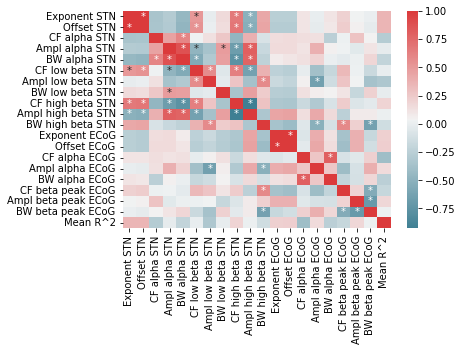

In [97]:
# plotting corr matrix
import seaborn as sns

siglevel = 0.05
annot = pvalues.mask(pvalues > siglevel)
# display(annot)    
annot_1 = pvalues.mask(pvalues <= siglevel, '*')
labels = annot_1.applymap(lambda v: str(v) if v == '*' else '')

cmap = sns.diverging_palette(220, 12, as_cmap=True)
sns.heatmap(corvalues, cmap=cmap, annot = labels, fmt='')
# sns.heatmap(corvalues, cmap=cmap, mask = mask, fmt='')

plt.rcParams['savefig.dpi'] = 300
plt.savefig('corr_matrix_MEDOff_sub006_SSD_with_annot.png', bbox_inches='tight')
plt.show()